<a href="https://colab.research.google.com/github/michaelraef12/Data-Mining-Projects/blob/main/AIAB_lab_sheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b> Acquired Intelligence & Adaptive Behaviour </b></center></h1>
<h2><center><i>An optimisation algorithm (Lab Sheet 02) </i></center></h2>


**Goal**: In this notebook we will start by implementing a population of hill climbers to solve a resource allocation (or knapsack) problem. We will then contruct the full microbial GA presented in lectures. This will involve designing a suitable fitness function and selection method. You will investigate the effects of hyperparameters such as mutation rate. 



# Knapsack problem

The knapsack (KP) problem is an example of a combinatorial optimization problem, refer to the [wiki](https://en.wikipedia.org/wiki/Knapsack_problem) for a broader overview. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png" width="200"></center>

It is concerned with a knapsack that has positive integer volume (or capacity) $V$. For instance, the knapsack may be able to store 20 cubic inches. There are $N$ distinct items that may potentially be placed in the knapsack. Item $i$ has a positive integer
volume $Vi$ (e.g this object is 8 cubic inches) and positive integer benefit $Bi$ (e.g how benefical is it to have this object in the knapsack). In the most basic form of the problem we will consider there are only one of each item available (0-1 KP).

The goal is to maximize benefit:

$$
\sum_i^N B_i
$$

Subject to the constraint that:

$$
\big ( \sum_i^N V_i \big) \leq  V
$$

For example suppose we have a knapsack that has a capacity of 20 cubic inches ($V$) and $N=10$ items of different sizes and different benefits. We want to include in the knapsack only these
items that will have the greatest total benefit within the constraint of the knapsack’s capacity.

```
item        a b c d e f g  h i j
Benefit (B) 5 6 1 9 2 8 4  3 7 10
Volume (V)  3 2 4 5 8 9 10 1 6 7
```


# Hill climbing agent
**Background**: Hill climbers may be used to find solutions to a wide variety of problems. Each hill climbing individual increases its fitness through trial and error:

1. Create a random individual
2. Change (mutate) the individual 
3. Measure how good this individual is for some task (fitness)
4. If it's worse than before, keep the original individual. Otherwise, keep the changed individual.
5. Goto 2


Our  algorithms will be composed of four components:

1. **Genotype**: a list of numbers which encode information about task solutions, representing an indvidual
2. **Genotype to phenotype mapping**: How should the genotype be interpreted as encoding a solution to our problem? This is analogous to the development of an organism from birth to adulthood. However, for this current problem, this should turn out to be quite trivial.
3. **Fitness function**: We need a way to evaluate how good each phenotype is as a potential solution to the card-sorting problem. How might this be implemented? 
4. A method for **mutation**. Is it necessary to allow random changes in the offspring produced by reproduction in order to maintain variability. 

> **Task**: Code a single hill climbing individuals to solve the above task. Implement your
algorithm in full and run it for at least 100 generations (i.e. repetitions of the algorithm).
Recording the fitness at each generation. Plot the fitness versus the generation number.
Have you found a solution? Try changing the mutation rate and observe the effects.

**Tips**:
- Code an individual as a single vector, using binary digits (0 or 1) for each gene. Each digit represents whether the corresponding object is being included in the knapsack. Below is an example of how to generate this in python:



In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:


# number of items in our problem
num_items = 30

# hill climbing genotype
genotype = np.random.choice([0, 1], (num_items))
print(genotype)

[0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0]


* There are several ways in which you can encode the problem itself (the volumes and benefit of each object). It may be useful to store these values as an array:

In [ ]:
import numpy as np

max_volume = 100
benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10, 5, 6, 1, 9, 2, 8, 4, 3, 7, 10, 5, 6, 1, 9, 2, 8, 4, 3, 7, 10])
volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7, 3, 2, 4, 5, 8, 9, 10, 1, 6, 7, 3, 2, 4, 5, 8, 9, 10, 1, 6, 7])
print(benefits)
print(volumes)

[ 5  6  1  9  2  8  4  3  7 10  5  6  1  9  2  8  4  3  7 10  5  6  1  9
  2  8  4  3  7 10]
[ 3  2  4  5  8  9 10  1  6  7  3  2  4  5  8  9 10  1  6  7  3  2  4  5
  8  9 10  1  6  7]


* The fitness function should return a _single number_ which quantifies how close to the ideal solution a phenotype is. Below is a rough example of what this function should look like:

In [ ]:
def fitness_function(gtype, benefits, volumes, max_volume):
    # put your fitness calculuations here
    
    total_volume = 0  #total volume for the phenotype in kg
    total_benefits = 0  #total benefits in phenotype in dollars $

#calculate total of benefits and volumes
    for i in range(volumes.shape[0]):
      total_benefits += benefits[i]*gtype[i]
    for i in range(volumes.shape[0]):
      total_volume += volumes[i]*gtype[i]

    if (total_volume <= max_volume): #check that volume isn't exceeding max volume
      fitness = total_benefits
    else:
      fitness = 0

    return fitness # a single number saying how good the geneotype is

* Implement your mutation by selecting a random gene (e.g by picking a random number between 1 and 10) and then flipping the number (0 to 1 or 1 to 0). 

* Overwrite the current individual if the new indvidual is better.

**You will need to integrate these features into a loop which performs the genetic algorithm detailed above**.

In [ ]:

def mutate(individual, rate = 0.2):
  '''
  Randomly mutate a single gene in an individual
  param individual: single individual to be mutated
  param rate: mutation rate
  return: the new individual after mutation
  '''
  random_rate = random.random()
  mutated_gene = random.randint(0,9)
  if random_rate < rate:
    if (individual[mutated_gene] == 1):
      individual[mutated_gene] = 0
    else:
      individual[mutated_gene] = 1
  
  return individual
  



#this method increases individual's fitness through trial and error
def hill_climb(gtype, m_rate):
  '''
  Function to do hill climb for a single individual
  param gtype: individual doing hill climb
  param m_rate: mutation rate that will be passed to the mutate() function
  return: individual after doing hill climb
  '''
  new_gtype = np.zeros(gtype.shape)
  f_old = fitness_function(gtype, benefits, volumes, max_volume)
  f_new = 0

#loop to make sure that new fitness isn't less that old one
  while (f_new < f_old):
    new_gtype = mutate(gtype, m_rate)
    f_new = fitness_function(new_gtype, benefits, volumes, max_volume)
  return new_gtype


> **Task**: Code a population of hill climbers that attempt to solve the task in parallel. Plot the fitness of the hillclimbers versus the number of tournaments. How many individuals are successful for each run. Is a population of hill climbers less or more computational expensive? What happens when you make the problem bigger or change the problem.


**Tips**:
- For a population of hill climbers code many individuals in a matrix and keep fitness values in vector:

In [ ]:
import numpy as np 

def create_pop(num_items = volumes.shape[0] , num_individuals = 100):
  '''
  Create population of many individuals
  param num_items: number of genes for each indiviual, default is the same number of objects as stated at the begining of the problem
  param num_individuals: number of individuals in the population
  return: population
  '''
  population = np.random.choice([0, 1], (num_individuals, num_items))

  return population

> **Task**: Demonstrate that a local minima exist. Can you find suboptimal solution that get worse with every mutation but is not the globally optimal solution. It can be helpful to plot fitness over time. 

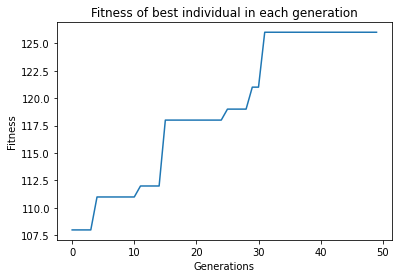

In [ ]:
#hill climb with mutation rate 0.2

#1st for loop is to iterate through number of generations starting at generation 0 which is the initial population
#2nd for loop is to iterate through population and do hill climbing for each individual
population = create_pop()
fitness_history = []           #array to record fitness for all generations
num_of_generations = 50
for i in range(num_of_generations): #1st for loop
  fitness = np.zeros(population.shape[0])   #array to record fitness for all individuals in a single generation
  
  for i in range(population.shape[0]):  #2nd for loop
    fitness[i] = fitness_function(hill_climb(population[i],0.2), benefits, volumes, max_volume)

  fitness_history.append(fitness)  #add fitness scores for current generation

#polt the best fitness in each generation against generation number
best_of_generation = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_of_generations)), best_of_generation)
plt.title('Fitness of best individual in each generation')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

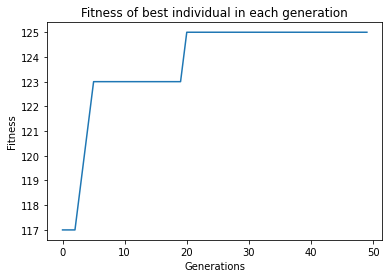

In [ ]:
#hill climb with mutation rate 0.7

#1st for loop is to iterate through number of generations starting at generation 0 which is the initial population
#2nd for loop is to iterate through population and do hill climbing for each individual
population = create_pop()
fitness_history = [] #array to record fitness for all generations
num_of_generations = 50
for i in range(num_of_generations):  #1st for loop
  fitness = np.zeros(population.shape[0])   #array to record fitness for all individuals in a single generation
  
  for i in range(population.shape[0]):  #2nd for loop
    fitness[i] = fitness_function(hill_climb(population[i],0.7), benefits, volumes, max_volume)


  fitness_history.append(fitness)    #add fitness scores for current generation

#polt the best fitness in each generation against generation number
best_of_generation = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_of_generations)), best_of_generation)
plt.title('Fitness of best individual in each generation')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()

# Microbial GA

We will implement a steady GA with tournament selection for the knapsack problem. See lecture notes for a full description. You will need:

1. **Population**: a collection of $N$ genotypes. See previous tips for information on how to encode this. 
2. **Genotype - phenotype** mapping (same as before)
3. **A fitness function** same as before, but now needs to return a list of fitness, one for each individual (e.g. length $N$)
4. A **tournament selection** method - how to pick some subset of individuals and select some winners
5. A **mutation operator** 

The Pseudocode is as follows:

1. Initialise random pop $P$
2. Pick 2 individuals at random & evaluate them (in terms of fitness) finding a winner (W) and loser (L) 
3. Replace L with W
4. Add a mutation to W
5. Goto 2

> **Task** Implement the above Pseudocode. Plot the fitness of the best individual versus the number of tournaments. How well does it perform. Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons.Does it do better than the hillclimber from last week? Whats is the effect of the mutation rate? 

 

In [ ]:
def tournament_selection(person1, person2):
  '''
  Select a loser and a winner between 2 individuals regarding their fitness score
  param person1: the 1st indivual 
  param person2: the 2nd indivual 
  return: a loser and a winner
  '''
  f1 = fitness_function(person1, benefits, volumes, max_volume)
  f2 = fitness_function(person2, benefits, volumes, max_volume)

  if (f1 > f2):
    winner = person1
    loser = person2
  else:
    loser = person1
    winner = person2

  return winner, loser

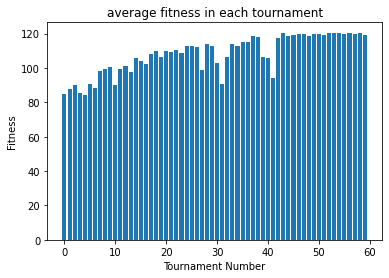

Mean of fitness is: 119.2
Max fitness achieved: 121.0


In [ ]:
#tournament selection with mutation rate 0.2

#do the GA for 60 rounds and each round there 10 tournaments done
#after each round, average fitness is calculated and stored
population = create_pop()
num_of_tournaments = 10
repeat_tournaments = 60
fitness = np.zeros(num_of_tournaments)
fitness_average = []   #store average fitness after each round
for num in range(repeat_tournaments):  #iterate through each round
  for i in range(num_of_tournaments):   #do a number of tournaments
    r1 = random.randint(0, population.shape[0]-1)
    r2 = random.randint(0, population.shape[0]-1)

    winner, loser = tournament_selection(population[r1], population[r2])
    population[r1] = winner
    population[r2] = mutate(winner, rate=0.2)
    fitness[i] = fitness_function(population[r1], benefits, volumes, max_volume)

  fitness_average.append(fitness.mean())  #add average fitness for each 10 tournaments




#Plot average fitness of each repeated number of tournaments
plt.bar(list(range(repeat_tournaments)), fitness_average)
plt.title('average fitness in each tournament')
plt.xlabel('Tournament Number')
plt.ylabel('Fitness')
plt.show()
print('Mean of fitness is:', fitness.mean())
print('Max fitness achieved:', fitness.max())

In [ ]:
#tournament selection with mutation rate 0.7

#do the GA for 60 rounds and each round there 10 tournaments done
#after each round, average fitness is calculated and stored
population = create_pop()
num_of_tournaments = 10
repeat_tournaments = 60
fitness = np.zeros(num_of_tournaments)
fitness_average = []   #store average fitness after each round
for num in range(repeat_tournaments):     #iterate through each round
  for i in range(num_of_tournaments):       #do a number of tournaments
    r1 = random.randint(0, population.shape[0]-1)
    r2 = random.randint(0, population.shape[0]-1)

    winner, loser = tournament_selection(population[r1], population[r2])
    population[r1] = winner
    population[r2] = mutate(winner, rate=0.7)
    fitness[i] = fitness_function(population[r1], benefits, volumes, max_volume)

  fitness_average.append(fitness.mean())        #add average fitness for each 10 tournaments

#Plot average fitness of each repeated number of tournaments
plt.bar(list(range(repeat_tournaments)), fitness_average)
plt.title('average fitness in each tournament')
plt.xlabel('Tournament Number')
plt.ylabel('Fitness')
plt.show()
print('Mean of fitness is:', fitness.mean())
print('Max fitness achieved:', fitness.max())